### Problem statment

Let's suppose, that there are a grup of objects - hunters. The goal of each hunter is to be inside of circle with given radius of group center and aloso do not touch other hunters (retain your own comfort zone). 
Hunter problem is that he knows restricted amount of information:

1. Dirrection of closest hunter velocity $v_{c}$: $\frac{v_{c}}{||v_{c}||}$
2. Does hunter distance to closest hunter reduced: $\{0,1\}$
3. Does closest hunter break into comfort zone with specified radius: $\{0,1\}$
4. Dirrection of group velocity $v_{g}$: $\frac{v_{g}}{||v_{g}||}$
5. Does hunter distance to group center reduced: $\{0,1\}$
6. Is hunter inside the circle of group center: $\{0,1\}$
7. Dirrection of hunter velocity $v_{h}$: $\frac{v_{h}}{||v_{h}||}$
8. Hunter force: $f_{h}$

In descrete time case hunter will have the following information:

1. Dirrection of closest hunter velocity: $\frac{x_{h_{c}}^0 - x_{h_{c}}^{-1}}{||x_{h_{c}}^0 - x_{h_{c}}^{-1}||}$

    $ c = arg \min\limits_{k\ne i} \left|\left|x_{h_i}^{-1}-x_{h_k}^{-1}\right|\right|$

2. Does hunter distance to closest neighbour hunter reduced: $h\left(d_i^{0}- d_i^{1}\right)$

    $ d_i^{-1} = \min\limits_{k\ne i} \left|\left|x_{h_i}^{-1}-x_{h_k}^{-1}\right|\right|$

    $ d_i^{0} = \min\limits_{k\ne i} \left|\left|x_{h_i}^{0}-x_{h_k}^{0}\right|\right|$

3. Does closest hunter break into comfort zone with radius $r_{cz}$: $h \left(r_{cz} -\left|\left|x_{h}^0-x_{c}^0\right|\right| \right)$

4. Dirrection of group velocity: $\frac{x_{g}^0 - x_{g}^{-1}}{||x_{g}^0 - x_{g}^{-1}||}$

    $x_g^{-1} = \overline{x_h}^{-1}$

    $x_g^{0} = \overline{x_h}^{0}$

5. Does hunter distance to group center reduced: $h\left(\left|\left|x_{h}^{-1}-x_{g}^{-1}\right|\right|-\left|\left|x_{h}^0-x_{g}^0\right|\right|\right)$

6. Is hunter inside  $r_{gc}$ - radius the circle  of the group center: $h \left(r_{gc} -\left|\left|x_{h}^0-x_{g}^0\right|\right| \right)$

7. Dirrection of hunter velocity: $\frac{x_{h_i}^0 - x_{h_i}^{-1}}{||x_{h_i}^0 - x_{h_i}^{-1}||}$

8. Hunter force: $f_{h_i}^{-1}$

### Environment

#### Hunter policy

Since hunter may moove only with speed constrained by some constant, we need to
constrain action space. Let's define max speed as $v_{max}$.
We may define our distribution via some function $G(x)$ from simple normal distribution $\mathcal{N}(x|\mu,diag(e^{2 s}))$.
Let's define function $g(x)$ so, that it was constrained in circle with radius $v_{max}$:
$$
G(x) = v_{max}\frac{x}{||x||_2}e^{-||x||_2^2} 
$$

$$\nabla_x\left[\textbf{f}(x)g(x)\right] = \frac{d\textbf{f}(x)}{dx}g(x)+\frac{dg(x)}{dx} \textbf{f}(x)^T $$

$$ \nabla_x G(x) =v_{max} \left( \frac{e^{-||x||_2^2}}{||x||_2} I + \nabla_x\left[\frac{e^{-||x||_2^2}}{||x||_2}\right]x^T\right) $$

$$ \nabla_x\left[\frac{e^{-||x||_2^2}}{||x||_2}\right] = \nabla_{||x||_2}\left[\frac{e^{-||x||_2^2}}{||x||_2}\right]\nabla_x||x||_2$$

$$\nabla_x||x||_2 = \frac{x}{||x||_2}$$
$$  \nabla_{||x||_2}\left[\frac{e^{-||x||_2^2}}{||x||_2}\right] = -\left[\frac{1}{||x||_2^2}+2\right]e^{-||x||_2^2}$$

$$ \nabla_x G(x) =v_{max}\frac{e^{-||x||_2^2}}{||x||_2} \left(I -\left[\frac{1}{||x||_2^2}+2\right] x x^T\right)  $$

$$\mathcal{J}_{G(x)}=-\left(v_{max} \frac{e^{-||x||_2^2}}{||x||_2}\right)^n \left(1-\left[\frac{1}{||x||_2^2}+2\right]||x||_2^2 \right) = 2\left(v_{max} \frac{e^{-||x||_2^2}}{||x||_2}\right)^n ||x||_2^2 $$

for 2 dimentions:
$$\mathcal{J}_{G(x)}=2 v_{max}^2 e^{-2||x||_2^2}$$

$$\ln(\mathcal{J}_{G(x)}^{-1})=2\left(||x||_2^2-\ln v_{max}\right)-\ln 2$$

So, PDF of distribution rv G(x) may be estimated as following:
$$\mathcal{N}(x|\mu,diag(e^{2s}))J_{G(x)}^{-1}$$

#### Reward assignmend

Reword is equal to:

    if current hunter inside group center circle:
        gc_reward = 2

    else, if distance to group center reduced:
        gc_reward = 1
   
    else:
        gc_reward = 0
        
    if  closest hunter break into comfort zone:
        cz_penalty = 1
    else:
        cz_penalty = 0
    
    reward = gc_reward - cz_penalty

In [212]:
import torch
from policy import HunterPolicy, VictimPolicy, Baseline
from environment import GroupedClusteringHunterEnvironment

from train import train, visualize_group
%matplotlib inline

env = GroupedClusteringHunterEnvironment(num_hunters=10,group_center_radius=2,
                                         comfort_zone_radius = 2*2/10,external_force=[0.3,0.3])

baseline = Baseline(env)
# policy = HunterPolicy(env,max_action=3)
# policy = torch.load('grouped_clustering_max_force_3_num_hunters_10.p')
policy = torch.load('100_clast/policy_37400.p')

In [213]:
baseline.reward_episode = []
policy.reward_episode = []
policy.policy_history = torch.Tensor([])

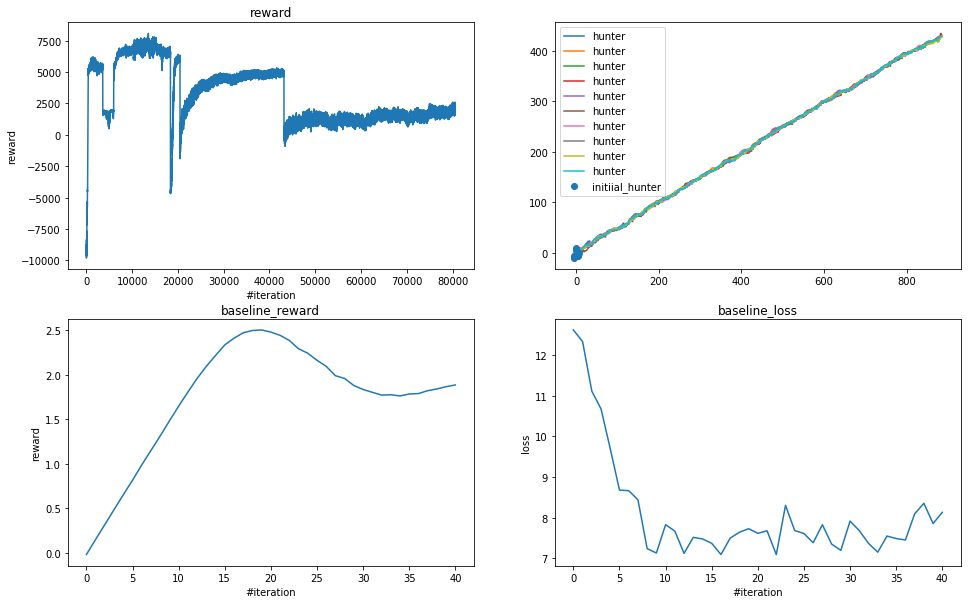

Episode 40 	Last reward: 1668.00
Last reward: 1.89


KeyboardInterrupt: 

In [214]:
%matplotlib inline


train(policy,env,100000, learning_rate=0.00001, baseline=baseline,dirpath='100_clast2')

In [49]:
# policy = torch.save(policy,'grouped_clustering_max_force_3_num_hunters_10.p')

In [215]:
torch.save(policy,'grouped_clustering_max_force_3_num_hunters_10_external_force_0.3.p')
# policy = torch.load('grouped_clustering_max_force_3_num_hunters_10.p')

### Test Visualization

<IPython.core.display.Javascript object>


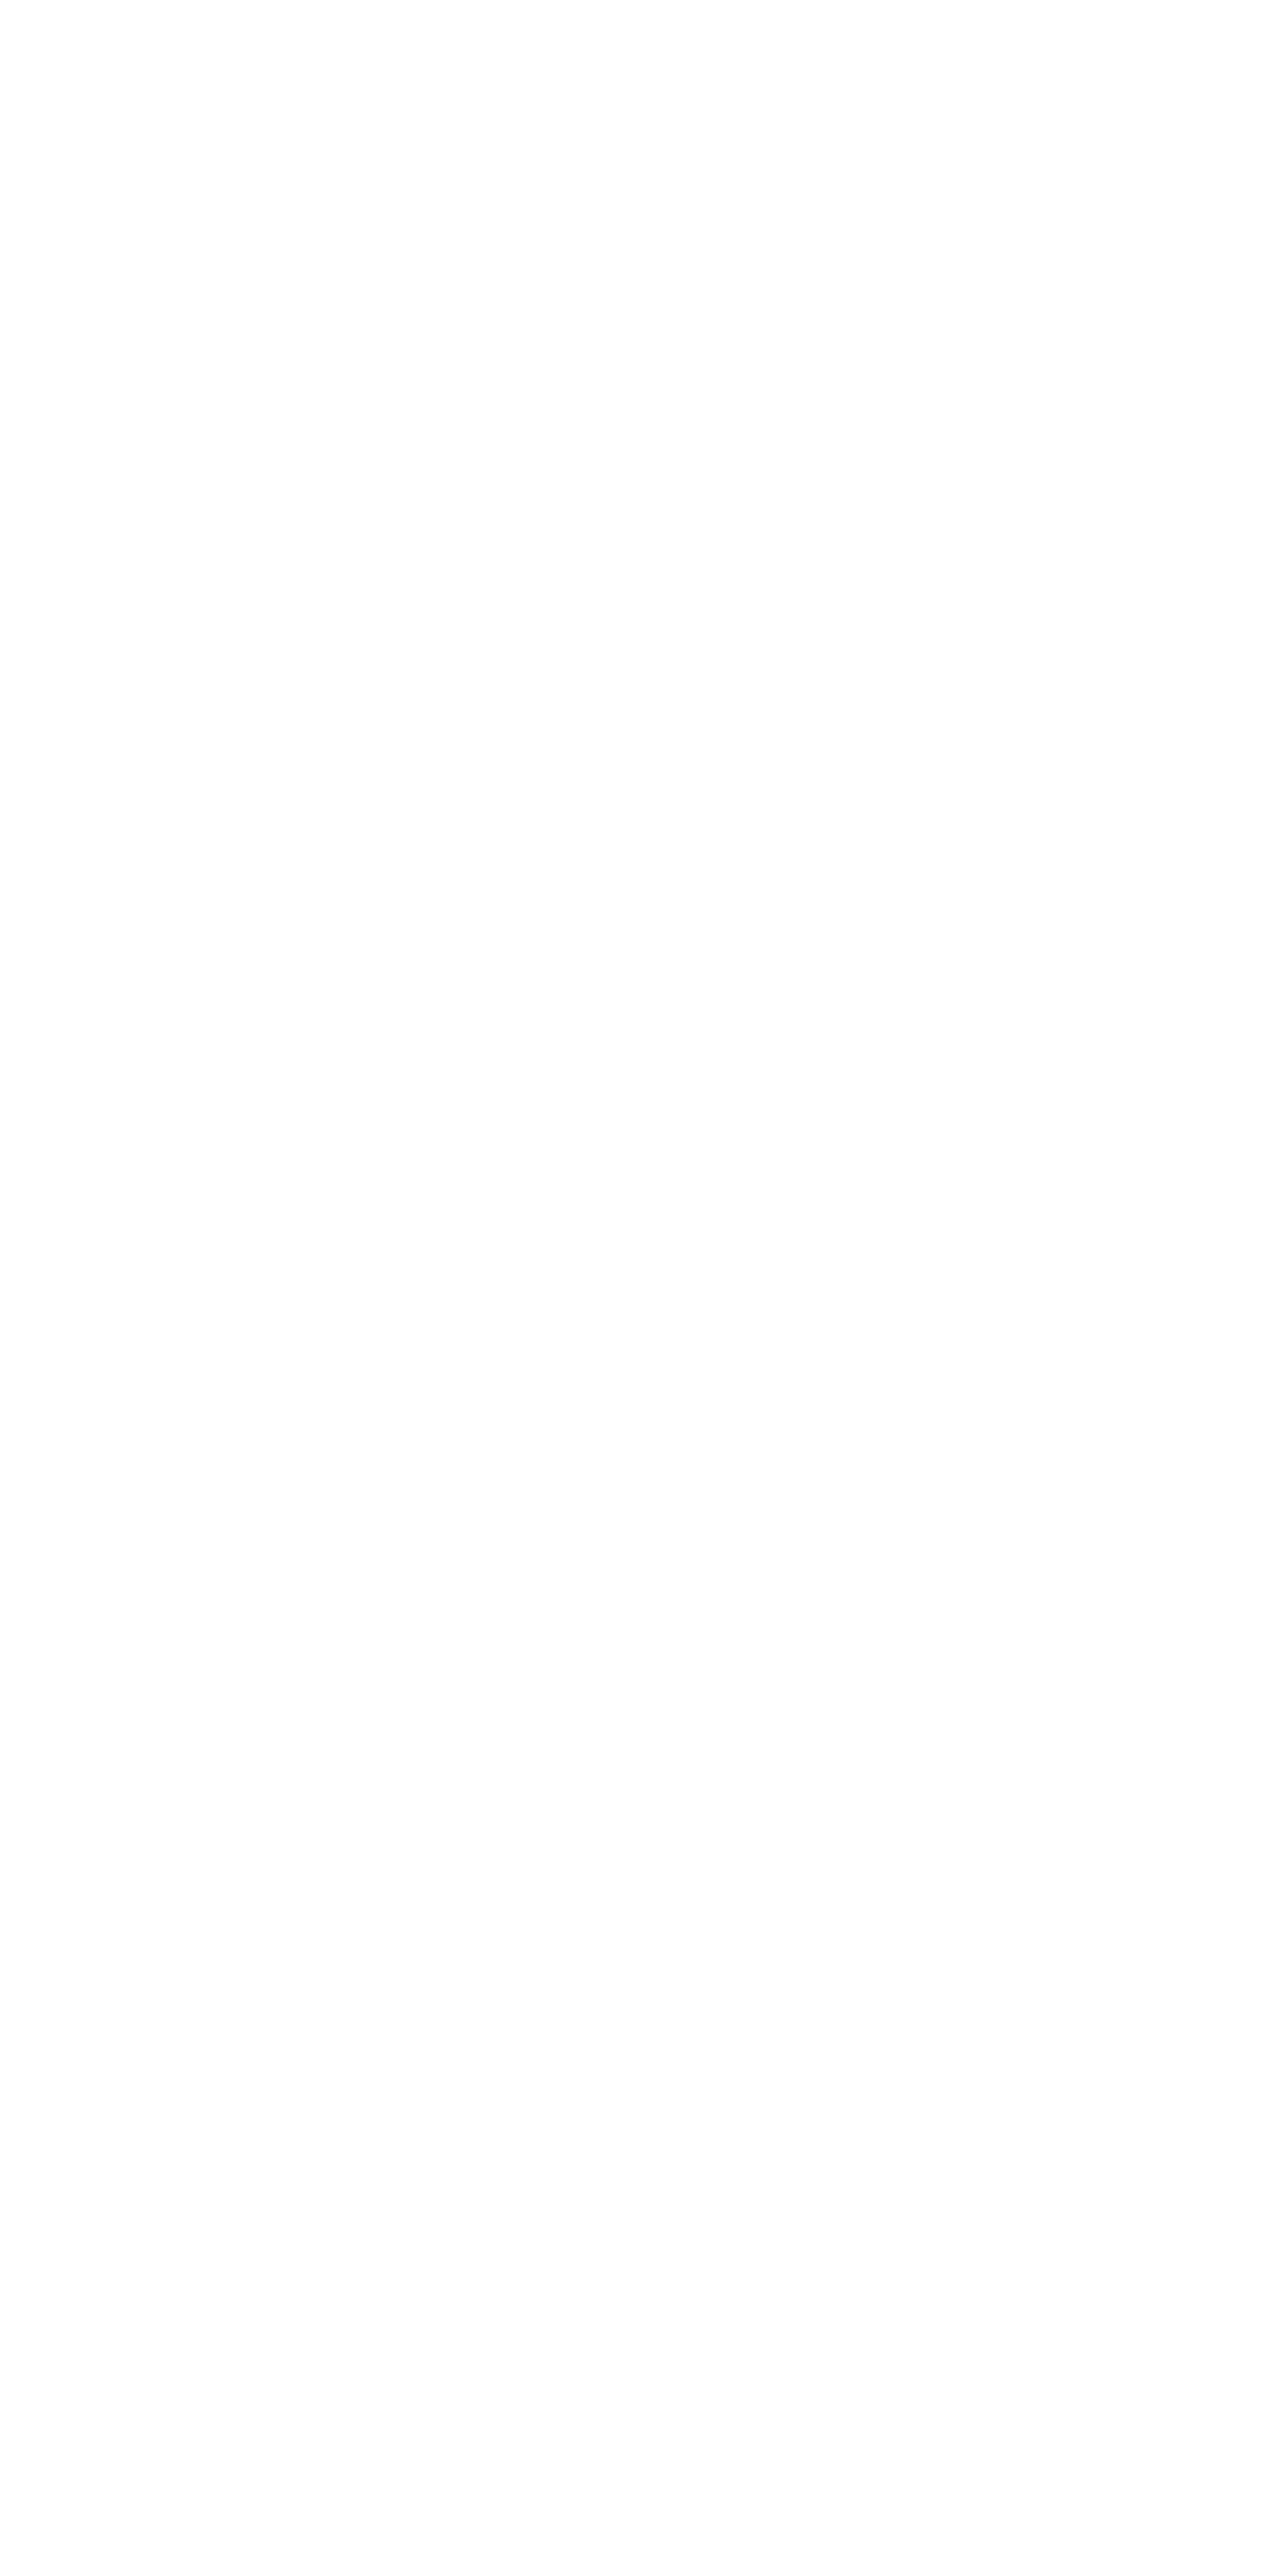

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_base.py:2961: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0, right=0
  'left=%s, right=%s') % (left, right))


KeyboardInterrupt: 

<IPython.core.display.Javascript object>


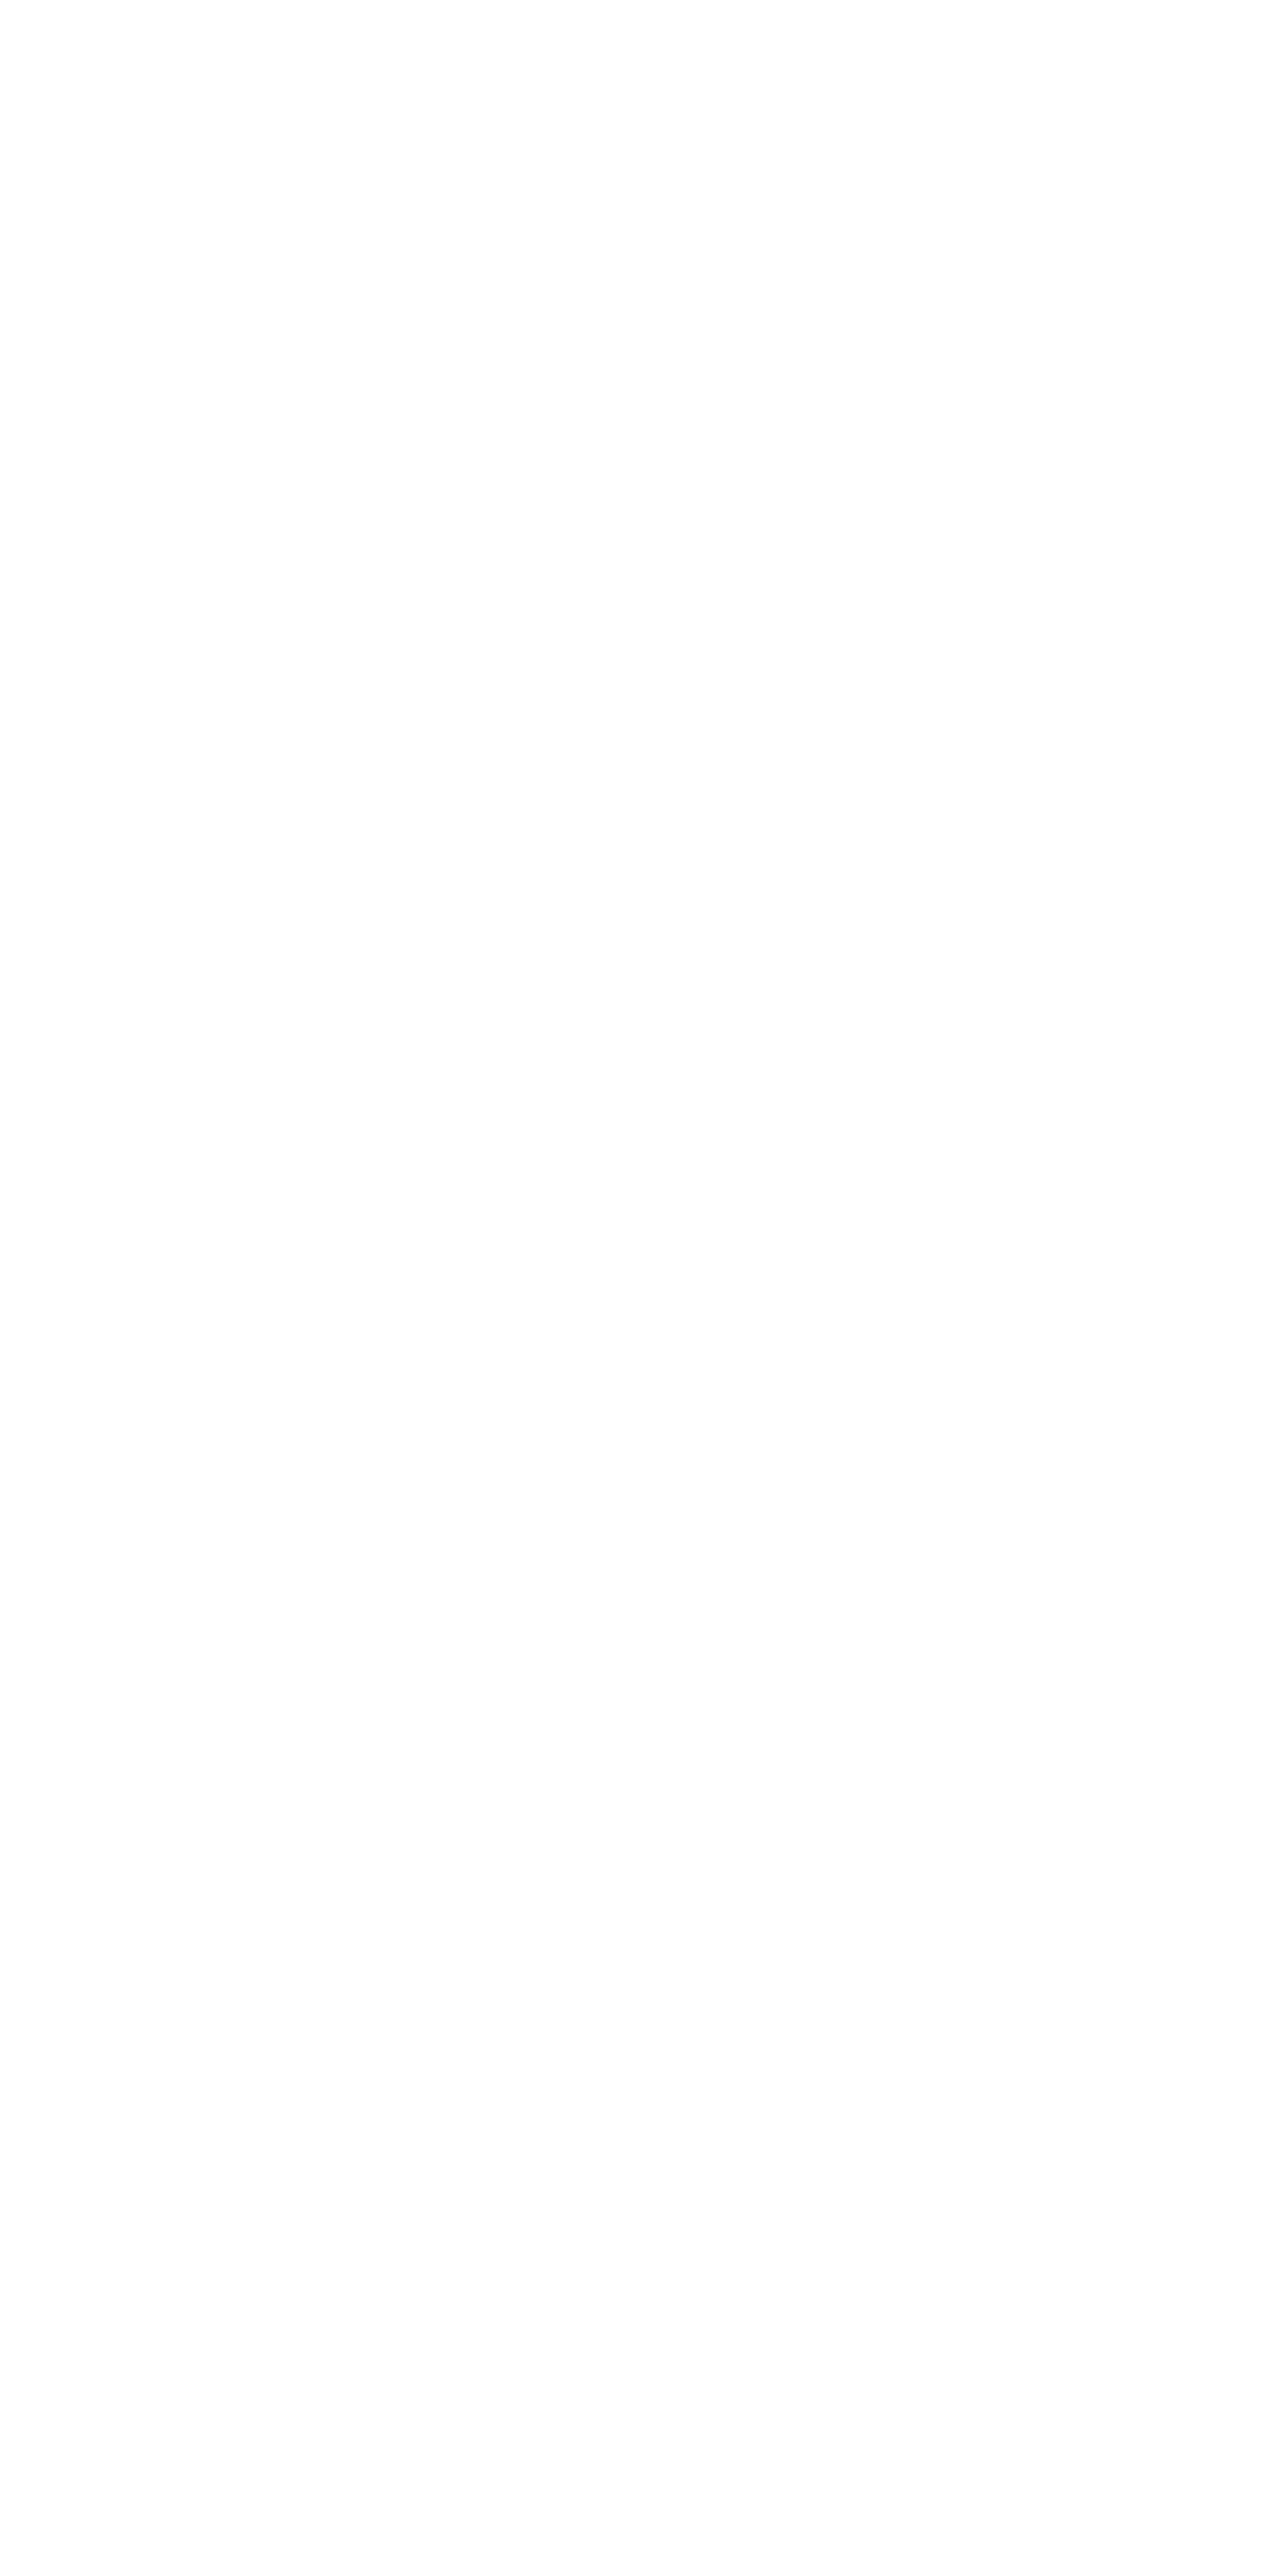

In [226]:
from grouped_clustering_visualization import model_hunter_learning
%matplotlib notebook

# policy = HunterPolicy(env,max_action=3)
# policy = torch.load('grouped_clustering_max_force_3_num_hunters_10.p')

env = GroupedClusteringHunterEnvironment(num_hunters=10,group_center_radius=2,
                                         comfort_zone_radius = 2*2/10)#,external_force=[0.1,0.1])
model_hunter_learning('Test. max action = 3',policy,env)

In [118]:
import numpy as np
import scipy.stats

external_force = [0*0.1,0.1]

policy = HunterPolicy(env,max_action=3)
# policy = torch.load('grouped_clustering_max_force_3_num_hunters_10.p')


env = GroupedClusteringHunterEnvironment(num_hunters=10,group_center_radius=2,
                                         comfort_zone_radius = 2*2/10,external_force=external_force)

def compute_shift_projection(policy,env,num_iterations = 1000):
    env.reset()
    for _ in range(num_iterations):
        policy(torch.Tensor(env.state))
        action,_ = policy.sample_action()
        env.step(action)
    external_force_direction = np.array(env.external_force)/np.linalg.norm(env.external_force)
    shift = env.group_trajectory[-1]-env.group_trajectory[0]
    shift_projection = shift@external_force_direction
    return shift_projection

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, (m-h, m+h)

def compute_mean_shift_projection(policy,env,force_module,num_iterations = 10):
    shift_projections = []
    for _ in range(num_iterations):
        r = np.random.randn(2)
        external_force_direction = r/np.linalg.norm(r)
        external_force = external_force_direction*force_module
        env.external_force = external_force
        shift_projections.append(compute_shift_projection(policy,env))
    
    return mean_confidence_interval(shift_projections)

def compute_shift_projections_in_force_range(policy,env,range):
    means = []
    confidence_intervals = []
    force_modules = np.linspace(*range)
    for force_module in force_modules:
        mean, confidence_interval = compute_mean_shift_projection(policy,env,force_module)
        means.append(mean)
        confidence_intervals.append(confidence_interval)
    lower_interval, upper_interval = np.array(confidence_intervals).T
    return means,(lower_interval, upper_interval), force_modules



In [231]:
random_policy = HunterPolicy(env,max_action=3)
trained_policy = torch.load('grouped_clustering_max_force_3_num_hunters_10.p')
random_means,(random_lower_interval, random_upper_interval), force_modules =\
        compute_shift_projections_in_force_range(random_policy,env,(0.01,3,30))
trained_means,(trained_lower_interval, trained_upper_interval), force_modules =\
        compute_shift_projections_in_force_range(trained_policy,env,(0.01,3,30))

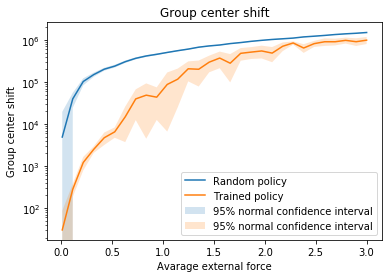

In [232]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import scipy.stats


plt.title('Group center shift')
plt.semilogy(force_modules,random_means,label = 'Random policy')
plt.fill_between(force_modules,random_lower_interval,random_upper_interval,alpha = 0.2, label = '95% normal confidence interval')
plt.semilogy(force_modules,trained_means,label = 'Trained policy')
plt.fill_between(force_modules,trained_lower_interval,trained_upper_interval,alpha = 0.2, label = '95% normal confidence interval')
plt.xlabel('Avarage external force')
plt.ylabel('Group center shift')
plt.legend()
plt.show()

In [218]:
def show_hunter_density(env, policy, title):
    env.reset()
    for _ in range(1000):
        policy(torch.Tensor(env.state))
        action,_ = policy.sample_action()
        env.step(action)

    normalized_trajectory = (env.hunter_trajectory - env.group_trajectory).reshape(-1,2)
    hist, xedges, yedges = np.histogram2d(*normalized_trajectory.T, bins=50, range=[[-4, 4], [-4, 4]],normed = True)
    plt.title(title)
    plt.pcolor(xedges,yedges,hist,cmap = 'gray')
    plt.colorbar()
    plt.show()


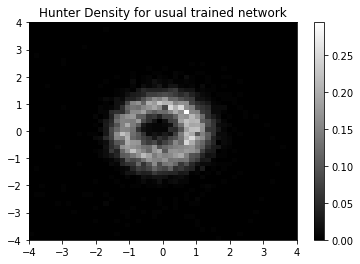

In [222]:
%matplotlib inline
env.external_force = 0
show_hunter_density(env, trained_policy, title = 'Hunter Density for usual trained network')

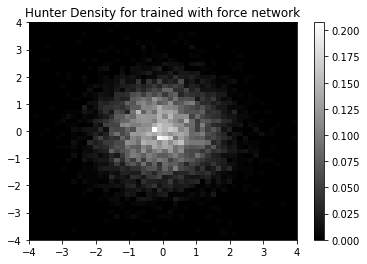

In [225]:
env.external_force = 0
show_hunter_density(env, policy, title = 'Hunter Density for trained with force network')